In [1]:
import os
import time
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import FormatStrFormatter

In [2]:
current_folder = os.getcwd()
huc12 = 'Hewett Creek'
huc12_foldername = "Hewett"
event_name = "hewett_ts1min_70mm1_0mm5"
distributions_filename = "distribution_list_1.txt"
with open ("./{}/{}".format(event_name, distributions_filename), 'r') as distr:
    all_lines = distr.readlines()
    distribution_list = [dist.strip() for dist in all_lines]

distribution_list.append("mix_0000")
df = pd.read_csv("./{}/{}/run_max.csv".format(event_name, "prova_mod_soilMin4000_0000000"))
df.rename(columns={"# Timestep":"Time", "1":"Baseline"}, inplace=True)
df.drop(columns=["0", "2"])

distribution_list = ["601667", "DSR_1", "DSR_2",
"US1_300611_par", "MID1_300649_par", "DS1_300916_par",
"US1_300520_ser", "MID1_300267_ser", "DS1_300639_ser"]
distribution_labels = ["Single Reservoir", "DSR 1", "DSR 2",
"Upstream Parallel", "Midstream Parallel", "Downstream Parallel", 
"Upstream Series", "Midstream Series", "Downstream Series"]
for i in range(len(distribution_list)):
    try:
        dist_df = pd.read_csv("./{}/{}/run_max.csv".format(event_name, distribution_list[i]))
    except:
        print("error on {}".format(distribution))
        continue
    df[distribution_labels[i]] = dist_df['1']

prec_df = pd.read_csv("./{}/{}/prec.csv".format(event_name, "prova_mod_soilMin4000_0000000"))
prec_df.rename(columns={"# Timestep":"Time", "1":"prec"}, inplace=True)
prec_df.drop(columns=["0", "2"])
df.head(5)


,Time,0,Baseline,2,Single Reservoir,DSR 1,DSR 2,Upstream Parallel,Midstream Parallel,Downstream Parallel,Upstream Series,Midstream Series,Downstream Series
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Single Reservoir_DSR 1_DSR 2_
C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


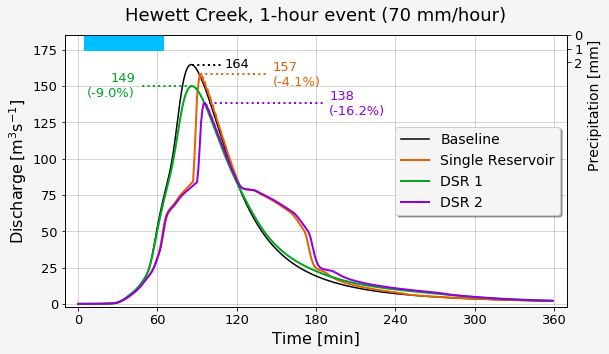

In [19]:
def plotHydrographs(df, prec_df, title, distributions=["0000000"]):
    #fig, ax = plt.subplots(7, 2, figsize=[16, 16], facecolor='whitesmoke')
    #fig.subplots_adjust(top=0.95, bottom=0.05, right=0.95, left=0.05)
    fig, ax1 = plt.subplots(figsize=[9, 5], facecolor='whitesmoke')
    #fig = plt.figure(figsize=[5, 3.5], facecolor='whitesmoke')
    #rect = 0.12, 0.09, 0.86, 0.85
    #ax = fig.add_axes(rect)
    ax2 = ax1.twinx()
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ttl = ax1.title
    ttl.set_position([0.5,1.03])
    #ax1.title("{}".format(title), fontsize=20)
    ax1.set_title(title, fontsize=18)

    #set grid and both axis
    ax1.grid(color='black', axis='both', alpha=0.2)
    ax1.set_xlim(xmin=-10, xmax=370)
    ax1.set_xticks([i for i in range(400) if i%60==0])
    ax1.set_xticklabels([i for i in range(400) if i%60==0], fontsize=13)
    ax1.set_ylim(ymin=-2, ymax=185)
    ax1.set_yticks([i for i in range(200) if i%25==0])
    ax1.set_yticklabels([i for i in range(200) if i%25==0], fontsize=13)
    ax2.set_ylim(ymin=20, ymax=0)
    ax2.set_yticks([0, 1, 2])
    ax2.set_yticklabels([0, 1, 2], fontsize=13)
    ax1.set_ylabel(r'$\mathregular{Discharge \/ [m^\mathregular{3} s^\mathregular{-1}]}$', size=16, labelpad=4)
    ax1.set_xlabel("Time [min]", size=16, labelpad=5)
    ax2.set_ylabel("Precipitation [mm]", size=14, labelpad=6, horizontalalignment='left')
    colors = [#'orangered', 
    [230.0/255, 97.0/255, 1.0/255, 1], #orange
    [0.0/255, 165.0/255, 35.0/255, 1], #green
    [147./255, 0.0/255, 219.0/255, 1], #purple
    
    'deepskyblue', 'magenta', 'sandybrown']

    # plot precipitation, hydrographs lines and annotations
    times = df.index #df["Time"]
    ax2.vlines(times, 0, prec_df['prec'], linewidth=2, color='deepskyblue')
    
    ax1.plot(times, df["Baseline"], linewidth=1.5, color='black', linestyle='solid', label="Baseline")
    maxQ_0 = df["Baseline"].max()
    x_maxQ_0 = df[df["Baseline"]==df["Baseline"].max()].index.tolist()[0]
    ax1.hlines(maxQ_0, x_maxQ_0, x_maxQ_0+22, linewidth=2, linestyles='dotted', color='black')
    ax1.text(x_maxQ_0+25.0, maxQ_0, int(maxQ_0), fontsize=13, color='black', verticalalignment='center')
    
    for i in range(len(distributions)):
        ax1.plot(times, df[distributions[i]], linewidth=2, color=colors[i], label=distributions[i])
        maxQ_dist = df[distributions[i]].max()
        x_maxQ_dist = df[df[distributions[i]]==df[distributions[i]].max()].index.tolist()[0]
        perc_change = 100*(maxQ_dist-maxQ_0)/maxQ_0
        peak_note = "{}\n({:.1f}%)".format(int(maxQ_dist),perc_change)
        if (i>0 and abs(maxQ_dist - df[distributions[i-1]].max()) > 10) or i==0:
            ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist+32+(i+1)*20, linewidth=2, linestyles='dotted', color=colors[i])
            ax1.text(x_maxQ_dist+35.0+(i+1)*20, maxQ_dist, peak_note, fontsize=13, color=colors[i],
    verticalalignment='center')
        else:
            ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist-22-(i)*18, linewidth=2, linestyles='dotted', color=colors[i])
            ax1.text(x_maxQ_dist-25.0-(i)*18, maxQ_dist, peak_note, fontsize=13, color=colors[i],
    verticalalignment='center', horizontalalignment='right')


    
    #set legend
    leg = ax1.legend(loc=7, fontsize=14, shadow=True)
    leg.get_frame().set_facecolor('whitesmoke')
    
    subsets_string = ""
    for distribution in distributions:
        subsets_string += distribution +"_"
    print(subsets_string)
    fig.savefig("./{}/images/".format(event_name)+"Q__{}.png".format(subsets_string))
    fig.show()
    
title = "{}, 1-hour event (70 mm/hour)".format(huc12)
# distributions = ["us54321", "ds43201"]
plotHydrographs(df, prec_df, title, ["Single Reservoir", "DSR 1", "DSR 2"])
# plotHydrographs(df, prec_df, title, ["mix6n01", "mix6y01"])
# plotHydrographs(df, prec_df, title, ["cen2301", "mix2001"])
# plotHydrographs(df, prec_df, title, ["US Parallel", "MIDpar", "DSpar"])
# plotHydrographs(df, prec_df, title, ["USser", "MIDser", "DSser"])
# plotHydrographs(df, prec_df, title, ["Upstream Parallel", "Upstream Series"])
# plotHydrographs(df, prec_df, title, ["Midstream Parallel", "Midstream Series"])
# plotHydrographs(df, prec_df, title, ["Downstream Parallel", "Downstream Series"])


# for distribution in distribution_list:
#     title = "{}, 100-year 1-hour event".format(huc12)  
#     plotHydrographs(df, prec_df, title, "ds43201")#distribution)
#     break

C:\Users\feder\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


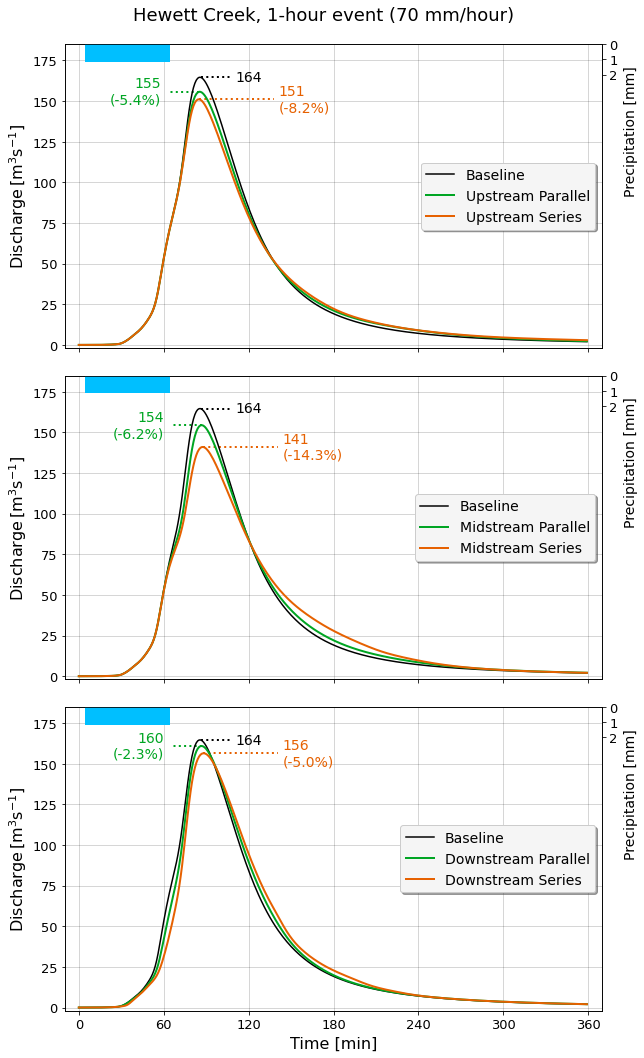

In [21]:
def plot_3_Hydrographs(df, prec_df, title, distributions=[["0000000"]]):
    #fig, ax = plt.subplots(7, 2, figsize=[16, 16], facecolor='whitesmoke')
    #fig.subplots_adjust(top=0.95, bottom=0.05, right=0.95, left=0.05)
    times = df.index #df["Time"]
    fig, axs = plt.subplots(3, 1, sharex=True, figsize=[9, 15])#, facecolor='whitesmoke')
    #fig = plt.figure(figsize=[5, 3.5], facecolor='whitesmoke')
    #rect = 0.12, 0.09, 0.86, 0.85
    #ax = fig.add_axes(rect)
    ttl = fig.suptitle(title, fontsize=18)
    # ttl.set_position([0.5, 0.995])
    #ax1.title("{}".format(title), fontsize=20)
    # ax1.set_title(title, fontsize=18)
    for j in range(3):
        ax1 = axs[j]
        ax2 = ax1.twinx()
        #set grid and both axis
        ax1.grid(color='black', axis='both', alpha=0.2)
        ax1.set_xlim(xmin=-10, xmax=370)
        ax1.set_xticks([i for i in range(370) if i%60==0])
        # plot precipitation,
        ax2.set_ylim(ymin=20, ymax=0)
        ax2.set_yticks([0, 1, 2])
        ax2.set_yticklabels([0, 1, 2], fontsize=13)
        ax2.set_ylabel("Precipitation [mm]", size=14, labelpad=6, horizontalalignment='left')
        ax2.vlines(times, 0, prec_df['prec'], linewidth=2, color='deepskyblue')
        ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax1.set_ylim(ymin=-2, ymax=185)
        ax1.set_yticks([i for i in range(200) if i%25==0])
        ax1.set_yticklabels([i for i in range(200) if i%25==0], fontsize=13)
        ax1.set_ylabel(r'$\mathregular{Discharge \/ [m^\mathregular{3} s^\mathregular{-1}]}$', size=16, labelpad=4)
            
        if j==2:
            ax1.set_xticks([i for i in range(370) if i%60==0])
            ax1.set_xticklabels([i for i in range(370) if i%60==0], fontsize=13)
            ax1.set_xlabel("Time [min]", size=16, labelpad=5)
        

        colors = [#'orangered', 
        [0.0/255, 165.0/255, 35.0/255, 1], #green
        [230.0/255, 97.0/255, 1.0/255, 1], #orange
        [147./255, 0.0/255, 219.0/255, 1], #purple
        
        'deepskyblue', 'magenta', 'sandybrown']

        # plot hydrographs lines and annotations
        ax1.plot(times, df["Baseline"], linewidth=1.5, color='black', linestyle='solid', label="Baseline")
        maxQ_0 = df["Baseline"].max()
        x_maxQ_0 = df[df["Baseline"]==df["Baseline"].max()].index.tolist()[0]
        ax1.hlines(maxQ_0, x_maxQ_0, x_maxQ_0+22, linewidth=2, linestyles='dotted', color='black')
        ax1.text(x_maxQ_0+25.0, maxQ_0, int(maxQ_0), fontsize=14, color='black', verticalalignment='center')
    
        for i in range(len(distributions[j])):
            ax1.plot(times, df[distributions[j][i]], linewidth=2, color=colors[i], label=distributions[j][i])
            maxQ_dist = df[distributions[j][i]].max()
            x_maxQ_dist = df[df[distributions[j][i]]==df[distributions[j][i]].max()].index.tolist()[0]
            perc_change = 100*(maxQ_dist-maxQ_0)/maxQ_0
            peak_note = "{}\n({:.1f}%)".format(int(maxQ_dist),perc_change)
            if (i>0 and abs(maxQ_dist - maxQ_0) > 10) or i==1:
                ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist+17+(i+1)*18, linewidth=2, linestyles='dotted', color=colors[i])
                ax1.text(x_maxQ_dist+20.0+(i+1)*18, maxQ_dist, peak_note, fontsize=14, color=colors[i],
        verticalalignment='center')
            else:
                ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist-22-(i)*15, linewidth=2, linestyles='dotted', color=colors[i])
                ax1.text(x_maxQ_dist-27.0-(i)*15, maxQ_dist, peak_note, fontsize=14, color=colors[i],
        verticalalignment='center', horizontalalignment='right')
    
        #set legend
        leg = ax1.legend(loc=7, fontsize=14, shadow=True)
        leg.get_frame().set_facecolor('whitesmoke')
        
    subsets_string = ""
    for distribution in distributions[j]:
        subsets_string += distribution +"_"
    plt.subplots_adjust(top=0.945, bottom=0.05, left=0.1, right=0.93, hspace=0.09, wspace=0.09)
    fig.savefig("./{}/images/".format(event_name)+"Q__{}.png".format(subsets_string))
    fig.show()
    
title = "{}, 1-hour event (70 mm/hour)".format(huc12)
# distributions = ["us54321", "ds43201"]
plot_3_Hydrographs(df, prec_df, title, [["Upstream Parallel", "Upstream Series"], ["Midstream Parallel", "Midstream Series"], ["Downstream Parallel", "Downstream Series"]])
# plotHydrographs(df, prec_df, title, ["mix6n01", "mix6y01"])
# plotHydrographs(df, prec_df, title, ["cen2301", "mix2001"])
# plotHydrographs(df, prec_df, title, ["USpar", "MIDpar", "DSpar"])
# plotHydrographs(df, prec_df, title, ["USser", "MIDser", "DSser"])
# plotHydrographs(df, prec_df, title, ["USpar", "USser"])
# plotHydrographs(df, prec_df, title, ["MIDpar", "MIDser"])
# plotHydrographs(df, prec_df, title, ["DSpar", "DSser"])


# for distribution in distribution_list:
#     title = "{}, 100-year 1-hour event".format(huc12)  
#     plotHydrographs(df, prec_df, title, "ds43201")#distribution)
#     break

Upstream Parallel_Upstream Series_
C:\Users\feder\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
Midstream Parallel_Midstream Series_
Downstream Parallel_Downstream Series_


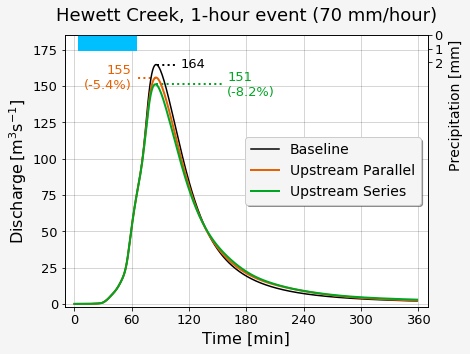

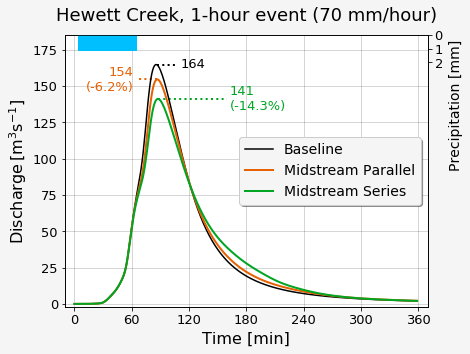

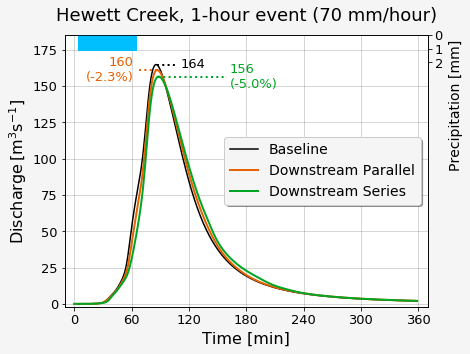

In [20]:
def plot_sq_Hydrographs(df, prec_df, title, distributions=["0000000"]):
    #fig, ax = plt.subplots(7, 2, figsize=[16, 16], facecolor='whitesmoke')
    #fig.subplots_adjust(top=0.95, bottom=0.05, right=0.95, left=0.05)
    fig, ax1 = plt.subplots(figsize=[6.5, 5], facecolor='whitesmoke')
    #fig = plt.figure(figsize=[5, 3.5], facecolor='whitesmoke')
    #rect = 0.12, 0.09, 0.86, 0.85
    #ax = fig.add_axes(rect)
    ax2 = ax1.twinx()
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
    ttl = ax1.title
    ttl.set_position([0.5,1.03])
    #ax1.title("{}".format(title), fontsize=20)
    ax1.set_title(title, fontsize=18)

    #set grid and both axis
    ax1.grid(color='black', axis='both', alpha=0.2)
    ax1.set_xlim(xmin=-10, xmax=370)
    ax1.set_xticks([i for i in range(400) if i%60==0])
    ax1.set_xticklabels([i for i in range(400) if i%60==0], fontsize=13)
    ax1.set_ylim(ymin=-2, ymax=185)
    ax1.set_yticks([i for i in range(200) if i%25==0])
    ax1.set_yticklabels([i for i in range(200) if i%25==0], fontsize=13)
    ax2.set_ylim(ymin=20, ymax=0)
    ax2.set_yticks([0, 1, 2])
    ax2.set_yticklabels([0, 1, 2], fontsize=13)
    ax1.set_ylabel(r'$\mathregular{Discharge \/ [m^\mathregular{3} s^\mathregular{-1}]}$', size=16, labelpad=4)
    ax1.set_xlabel("Time [min]", size=16, labelpad=5)
    ax2.set_ylabel("Precipitation [mm]", size=14, labelpad=6, horizontalalignment='left')
    colors = [#'orangered', 
    [230.0/255, 97.0/255, 1.0/255, 1], #orange
    [0.0/255, 165.0/255, 35.0/255, 1], #green
    [147./255, 0.0/255, 219.0/255, 1], #purple
    
    'deepskyblue', 'magenta', 'sandybrown']

    # plot precipitation, hydrographs lines and annotations
    times = df.index #df["Time"]
    ax2.vlines(times, 0, prec_df['prec'], linewidth=2, color='deepskyblue')
    
    ax1.plot(times, df["Baseline"], linewidth=1.5, color='black', linestyle='solid', label="Baseline")
    maxQ_0 = df["Baseline"].max()
    x_maxQ_0 = df[df["Baseline"]==df["Baseline"].max()].index.tolist()[0]
    ax1.hlines(maxQ_0, x_maxQ_0, x_maxQ_0+22, linewidth=2, linestyles='dotted', color='black')
    ax1.text(x_maxQ_0+25.0, maxQ_0, int(maxQ_0), fontsize=13, color='black', verticalalignment='center')
    
    for i in range(len(distributions)):
        ax1.plot(times, df[distributions[i]], linewidth=2, color=colors[i], label=distributions[i])
        maxQ_dist = df[distributions[i]].max()
        x_maxQ_dist = df[df[distributions[i]]==df[distributions[i]].max()].index.tolist()[0]
        perc_change = 100*(maxQ_dist-maxQ_0)/maxQ_0
        peak_note = "{}\n({:.1f}%)".format(int(maxQ_dist),perc_change)
        if (i>0 and abs(maxQ_dist - maxQ_0) > 10) or i==1:
            ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist+32+(i+1)*20, linewidth=2, linestyles='dotted', color=colors[i])
            ax1.text(x_maxQ_dist+35.0+(i+1)*20, maxQ_dist, peak_note, fontsize=13, color=colors[i],
    verticalalignment='center')
        else:
            ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist-22-(i)*18, linewidth=2, linestyles='dotted', color=colors[i])
            ax1.text(x_maxQ_dist-25.0-(i)*18, maxQ_dist, peak_note, fontsize=13, color=colors[i],
    verticalalignment='center', horizontalalignment='right')


    
    #set legend
    leg = ax1.legend(loc=7, fontsize=14, shadow=True)
    leg.get_frame().set_facecolor('whitesmoke')
    
    subsets_string = ""
    for distribution in distributions:
        subsets_string += distribution +"_"
    print(subsets_string)
    fig.savefig("./{}/images/".format(event_name)+"Q__{}.png".format(subsets_string))
    fig.show()
    
title = "{}, 1-hour event (70 mm/hour)".format(huc12)
# distributions = ["us54321", "ds43201"]
# plot_sq_Hydrographs(df, prec_df, title, ["Single Res", "DSR 1", "DSR 2"])
# plot_sq_Hydrographs(df, prec_df, title, ["mix6n01", "mix6y01"])
# plot_sq_Hydrographs(df, prec_df, title, ["cen2301", "mix2001"])
# plot_sq_Hydrographs(df, prec_df, title, ["US Parallel", "MIDpar", "DSpar"])
# plot_sq_Hydrographs(df, prec_df, title, ["USser", "MIDser", "DSser"])
plot_sq_Hydrographs(df, prec_df, title, ["Upstream Parallel", "Upstream Series"])
plot_sq_Hydrographs(df, prec_df, title, ["Midstream Parallel", "Midstream Series"])
plot_sq_Hydrographs(df, prec_df, title, ["Downstream Parallel", "Downstream Series"])


# for distribution in distribution_list:
#     title = "{}, 100-year 1-hour event".format(huc12)  
#     plotHydrographs(df, prec_df, title, "ds43201")#distribution)
#     break

In [ ]:
import matplotlib.colors import ColorConverter

In [29]:
targetcolor_list = ['orangered', 'darkviolet', 'mediumpurple', 'forestgreen', 'limegreen', 'deepskyblue', 'magenta', 'sandybrown']
for color in targetcolor_list:
    print(color, [255*val for val in list(matplotlib.colors.to_rgba(color))])

orangered [255.0, 69.0, 0.0, 255.0]
darkviolet [148.0, 0.0, 211.0, 255.0]
mediumpurple [147.0, 112.0, 219.0, 255.0]
forestgreen [34.0, 139.0, 34.0, 255.0]
limegreen [50.0, 205.0, 50.0, 255.0]
deepskyblue [0.0, 191.0, 255.0, 255.0]
magenta [255.0, 0.0, 255.0, 255.0]
sandybrown [244.0, 164.0, 96.0, 255.0]


In [16]:
print(max(df['mix0000']))#.max)

149.77081298828125


ipykernel_launcher:125: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


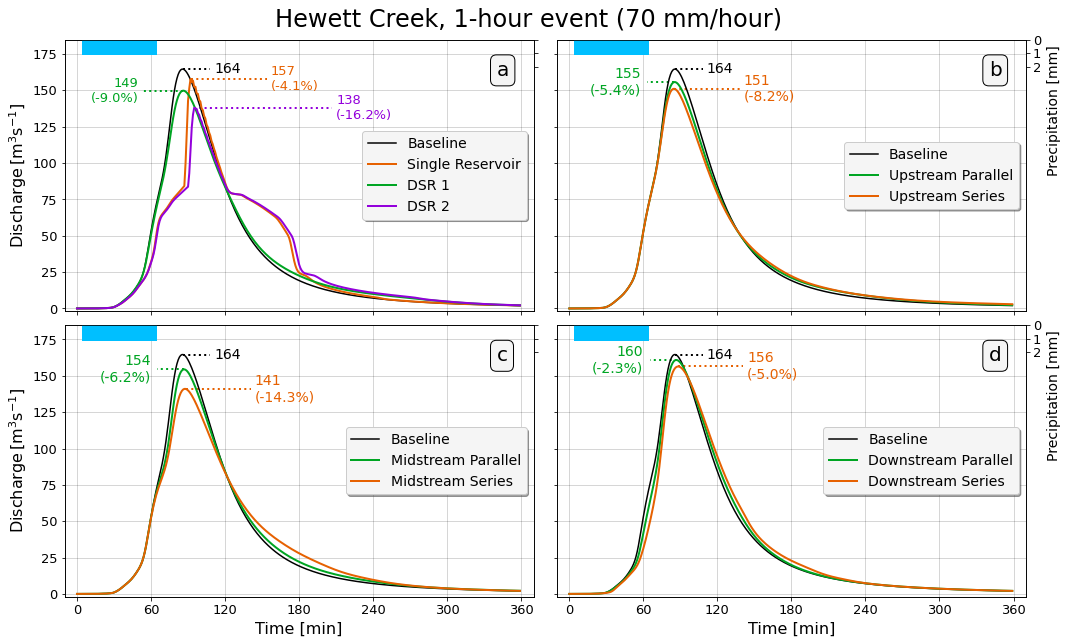

In [24]:
def plot_4_Hydrographs(df, prec_df, title, distributions=[["0000000"]]):
    plot_ids = ['a', 'b', 'c', 'd']
    #fig, ax = plt.subplots(7, 2, figsize=[16, 16], facecolor='whitesmoke')
    #fig.subplots_adjust(top=0.95, bottom=0.05, right=0.95, left=0.05)
    times = df.index #df["Time"]
    fig, axs = plt.subplots(2, 2, sharex=True, figsize=[15, 9])#, facecolor='whitesmoke')
    #fig = plt.figure(figsize=[5, 3.5], facecolor='whitesmoke')
    #rect = 0.12, 0.09, 0.86, 0.85
    #ax = fig.add_axes(rect)
    ttl = fig.suptitle(title, fontsize=24)
    # ttl.set_position([0.5, 0.995])
    #ax1.title("{}".format(title), fontsize=20)
    # ax1.set_title(title, fontsize=18)
    for r in range(2):
        for j in range(2):
            ax1 = axs[r, j]
            ax2 = ax1.twinx()
            #set grid and both axis
            ax1.grid(color='black', axis='both', alpha=0.2)
            ax1.set_xlim(xmin=-10, xmax=370)
            ax1.set_xticks([i for i in range(370) if i%60==0])
            ax1.set_ylim(ymin=-2, ymax=185)
            ax1.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
            ax1.set_yticks([i for i in range(200) if i%25==0])
            
            # plot precipitation,
            ax2.set_ylim(ymin=20, ymax=0)
            ax2.set_yticks([0, 1, 2])
            if j==1:
                ax2.set_yticks([0, 1, 2])
                ax2.set_yticklabels([0, 1, 2], fontsize=13)
                ax2.set_ylabel("Precipitation [mm]", size=14, labelpad=6, horizontalalignment='left')
            else:
                ax2.set_yticklabels([], fontsize=13)
            ax2.vlines(times, 0, prec_df['prec'], linewidth=2, color='deepskyblue')
            
            if j==0:
                ax1.set_yticklabels([i for i in range(200) if i%25==0], fontsize=13)
                ax1.set_ylabel(r'$\mathregular{Discharge \/ [m^\mathregular{3} s^\mathregular{-1}]}$', size=16, labelpad=4)
            else:
                 ax1.set_yticklabels([], fontsize=13)

            
            if r==1:
                ax1.set_xticks([i for i in range(370) if i%60==0])
                ax1.set_xticklabels([i for i in range(370) if i%60==0], fontsize=13)
                ax1.set_xlabel("Time [min]", size=16, labelpad=5)
        

    for r in range(2):
        for j in range(2):
            ax1 = axs[r, j]
            # plot hydrographs lines and annotations
            ax1.plot(times, df["Baseline"], linewidth=1.5, color='black', linestyle='solid', label="Baseline")
            maxQ_0 = df["Baseline"].max()
            x_maxQ_0 = df[df["Baseline"]==df["Baseline"].max()].index.tolist()[0]
            ax1.hlines(maxQ_0, x_maxQ_0, x_maxQ_0+22, linewidth=2, linestyles='dotted', color='black')
            ax1.text(x_maxQ_0+25.0, maxQ_0, int(maxQ_0), fontsize=14, color='black', verticalalignment='center')
    
    # plot single reservoirs vs DSRs in top left quadrant
    ax1 = axs[0,0]
    colors = [#'orangered', 
    [230.0/255, 97.0/255, 1.0/255, 1], #orange
    [0.0/255, 165.0/255, 35.0/255, 1], #green
    [147./255, 0.0/255, 219.0/255, 1], #purple
    'deepskyblue', 'magenta', 'sandybrown']
    for i in range(len(distributions[0])):
        ax1.plot(times, df[distributions[0][i]], linewidth=2, color=colors[i], label=distributions[0][i])
        maxQ_dist = df[distributions[0][i]].max()
        x_maxQ_dist = df[df[distributions[0][i]]==df[distributions[0][i]].max()].index.tolist()[0]
        perc_change = 100*(maxQ_dist-maxQ_0)/maxQ_0
        peak_note = "{}\n({:.1f}%)".format(int(maxQ_dist),perc_change)
        if (i>0 and abs(maxQ_dist - df[distributions[0][i-1]].max()) > 10) or i==0:
            ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist+37+(i+1)*25, linewidth=2, linestyles='dotted', color=colors[i])
            ax1.text(x_maxQ_dist+40.0+(i+1)*25, maxQ_dist, peak_note, fontsize=13, color=colors[i],
    verticalalignment='center')
        else:
            ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist-17-(i)*16, linewidth=2, linestyles='dotted', color=colors[i])
            ax1.text(x_maxQ_dist-20.0-(i)*16, maxQ_dist, peak_note, fontsize=13, color=colors[i],
    verticalalignment='center', horizontalalignment='right')
    ax1.text(340, 160, plot_ids[0], fontsize=20, backgroundcolor='whitesmoke', bbox={'boxstyle':'round', 'facecolor':'whitesmoke'})
    #set legend
    leg = ax1.legend(loc=7, fontsize=14, shadow=True)
    leg.get_frame().set_facecolor('whitesmoke')


     # plot parallel vs series in three other quadrants
    colors = [#'orangered', 
    [0.0/255, 165.0/255, 35.0/255, 1], #green
    [230.0/255, 97.0/255, 1.0/255, 1], #orange
    [147./255, 0.0/255, 219.0/255, 1], #purple
    'deepskyblue', 'magenta', 'sandybrown']
    for j in range(1, 4):
        if j==1:
            ax1 = axs[0,1]
        elif j==2:
            ax1 = axs[1,0]
        else:
            ax1 = axs[1,1]
        for i in range(len(distributions[j])):
            ax1.plot(times, df[distributions[j][i]], linewidth=2, color=colors[i], label=distributions[j][i])
            maxQ_dist = df[distributions[j][i]].max()
            x_maxQ_dist = df[df[distributions[j][i]]==df[distributions[j][i]].max()].index.tolist()[0]
            perc_change = 100*(maxQ_dist-maxQ_0)/maxQ_0
            peak_note = "{}\n({:.1f}%)".format(int(maxQ_dist),perc_change)
            if (i>0 and abs(maxQ_dist - maxQ_0) > 10) or i==1:
                ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist+17+(i+1)*18, linewidth=2, linestyles='dotted', color=colors[i])
                ax1.text(x_maxQ_dist+20.0+(i+1)*18, maxQ_dist, peak_note, fontsize=14, color=colors[i],
        verticalalignment='center')
            else:
                ax1.hlines(maxQ_dist, x_maxQ_dist, x_maxQ_dist-22-(i)*15, linewidth=2, linestyles='dotted', color=colors[i])
                ax1.text(x_maxQ_dist-27.0-(i)*15, maxQ_dist, peak_note, fontsize=14, color=colors[i],
        verticalalignment='center', horizontalalignment='right')

        ax1.text(340, 160, plot_ids[j], fontsize=20, backgroundcolor='whitesmoke', bbox={'boxstyle':'round', 'facecolor':'whitesmoke'})
        #set legend
        leg = ax1.legend(loc=7, fontsize=14, shadow=True)
        leg.get_frame().set_facecolor('whitesmoke')
        
    subsets_string = ""
    for distribution in distributions[j]:
        subsets_string += distribution +"_"
    plt.subplots_adjust(top=0.93, bottom=0.07, left=0.07, right=0.96, hspace=0.05, wspace=0.05)
    fig.savefig("./{}/images/".format(event_name)+"Q__{}.jpg".format("tutto"), dpi=300)
    fig.show()
    
title = "{}, 1-hour event (70 mm/hour)".format(huc12)
# distributions = ["us54321", "ds43201"]
plot_4_Hydrographs(df, prec_df, title, [["Single Reservoir", "DSR 1", "DSR 2"],
["Upstream Parallel", "Upstream Series"], 
["Midstream Parallel", "Midstream Series"], 
["Downstream Parallel", "Downstream Series"]])
# plotHydrographs(df, prec_df, title, ["mix6n01", "mix6y01"])
# plotHydrographs(df, prec_df, title, ["cen2301", "mix2001"])
# plotHydrographs(df, prec_df, title, ["USpar", "MIDpar", "DSpar"])
# plotHydrographs(df, prec_df, title, ["USser", "MIDser", "DSser"])
# plotHydrographs(df, prec_df, title, ["USpar", "USser"])
# plotHydrographs(df, prec_df, title, ["MIDpar", "MIDser"])
# plotHydrographs(df, prec_df, title, ["DSpar", "DSser"])


# for distribution in distribution_list:
#     title = "{}, 100-year 1-hour event".format(huc12)  
#     plotHydrographs(df, prec_df, title, "ds43201")#distribution)
#     break